<a href="https://colab.research.google.com/github/TingEekum/Titanic-Survival-Classification-Based-on-Ensemble-Learning-Models/blob/main/Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install sktime

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 35.5/35.5 MB 21.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 145.7/145.7 kB 10.6 MB/s eta 0:00:00


In [ ]:
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import RobustScaler
from sklearn.feature_selection import mutual_info_classif
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,HistGradientBoostingClassifier
from xgboost import XGBClassifier
from sktime.classification.sklearn import RotationForest
from sklearn.metrics import mean_absolute_error,mean_squared_error,accuracy_score,precision_score,recall_score,f1_score

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
path="/content/drive/MyDrive/Titanic/train.csv"
df=pd.read_csv(path)

# Data Preprocessing

In [ ]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
df["Title"]=df["Name"].str.extract(r",\s*([^\.]+)\.",expand=False)
print(df["Title"].unique())
df["Title"]=df["Title"].replace("Mme","Mrs")
df["Title"]=df["Title"].replace(["Mlle","Ms"],"Miss")
df["Title"]=df["Title"].replace(["Don","Rev","Dr","Major","Col","Capt","Jonkheer","Sir"],"Rare_Male")
df["Title"]=df["Title"].replace(["Lady","the Countess"],"Rare_Female")

['Mr' 'Mrs' 'Miss' 'Master' 'Don' 'Rev' 'Dr' 'Mme' 'Ms' 'Major' 'Lady'
 'Sir' 'Mlle' 'Col' 'Capt' 'the Countess' 'Jonkheer']


In [ ]:
df.drop(["PassengerId","Name","Ticket","Cabin"],axis=1,inplace=True)

In [ ]:
for i in range(len(df["Age"])):
  if pd.isna(df["Age"][i]):
    print(df["Title"][i])

Mr
Mr
Mrs
Mr
Miss
Mr
Mrs
Miss
Mr
Mr
Mr
Mr
Miss
Mr
Mr
Mr
Master
Mr
Mr
Miss
Mr
Mr
Mr
Mr
Miss
Mr
Mr
Miss
Mrs
Mr
Mr
Master
Mrs
Mr
Master
Miss
Mr
Mr
Mrs
Mr
Miss
Mr
Mr
Mr
Miss
Miss
Miss
Miss
Mr
Mrs
Mr
Miss
Mr
Miss
Mr
Mr
Mr
Mr
Miss
Mr
Miss
Mr
Miss
Mr
Miss
Mrs
Mr
Mrs
Mr
Mr
Miss
Miss
Mr
Mrs
Miss
Mrs
Mr
Mr
Miss
Mr
Mr
Mr
Mrs
Mr
Mr
Mr
Mrs
Mr
Mr
Mr
Mrs
Mr
Mr
Mr
Mr
Mr
Mr
Mr
Miss
Mr
Mr
Mr
Miss
Mr
Mr
Mr
Mr
Mr
Mr
Mr
Mrs
Mr
Mr
Mr
Mr
Mr
Mr
Miss
Mr
Miss
Mrs
Mr
Mr
Miss
Miss
Mr
Mr
Mr
Mr
Miss
Mr
Mr
Mr
Mr
Mr
Mr
Mr
Miss
Mr
Mr
Mrs
Mr
Miss
Mr
Miss
Master
Mr
Mr
Miss
Mr
Mr
Mr
Mr
Mr
Rare_Male
Mr
Mr
Mr
Mr
Mr
Mr
Miss
Mr
Mr
Mr
Mr
Mr
Mr
Mr
Mr
Mr
Mrs
Mr
Miss
Mr
Mr
Miss


In [ ]:
df["Age"]=df["Age"].fillna(df.groupby("Title")["Age"].transform("median"))
df["Embarked"]=df["Embarked"].fillna(df["Embarked"].mode()[0])

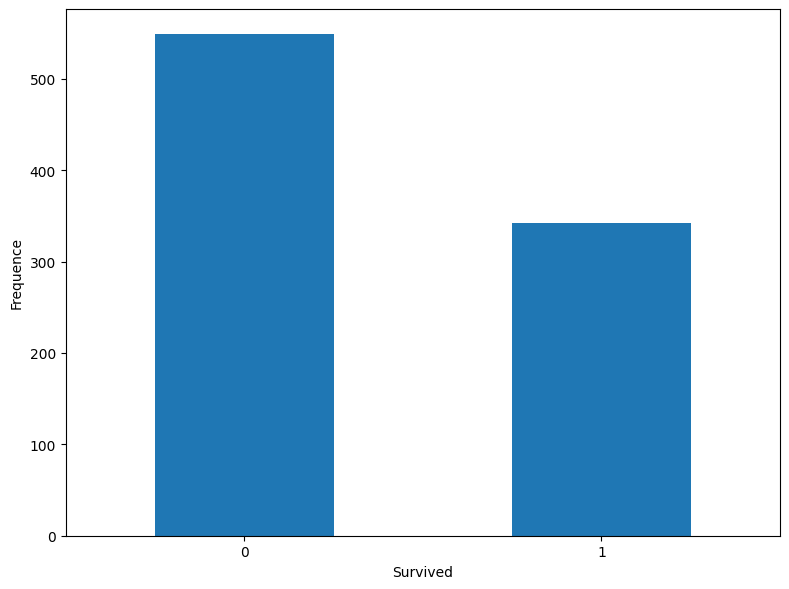

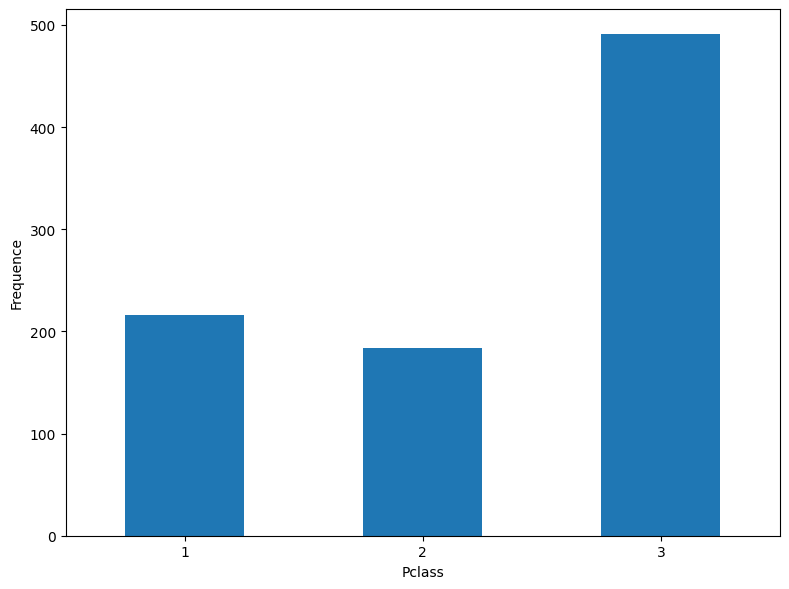

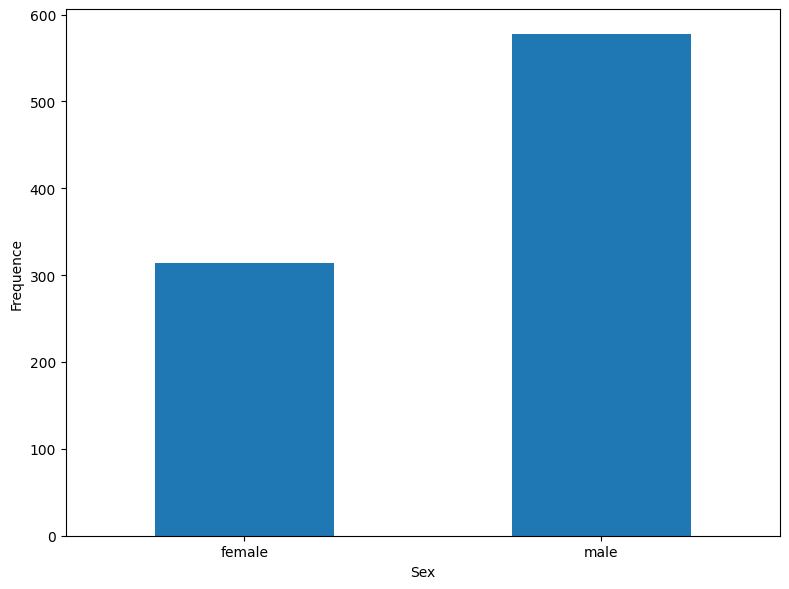

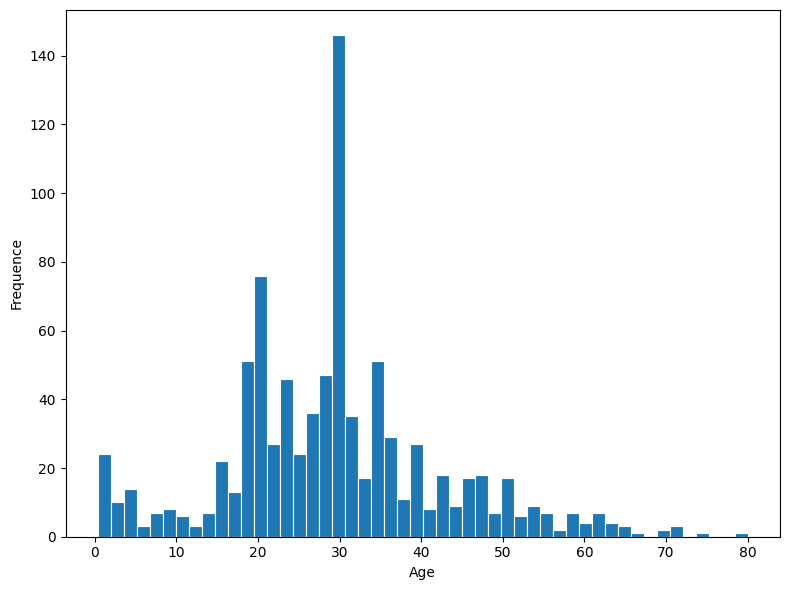

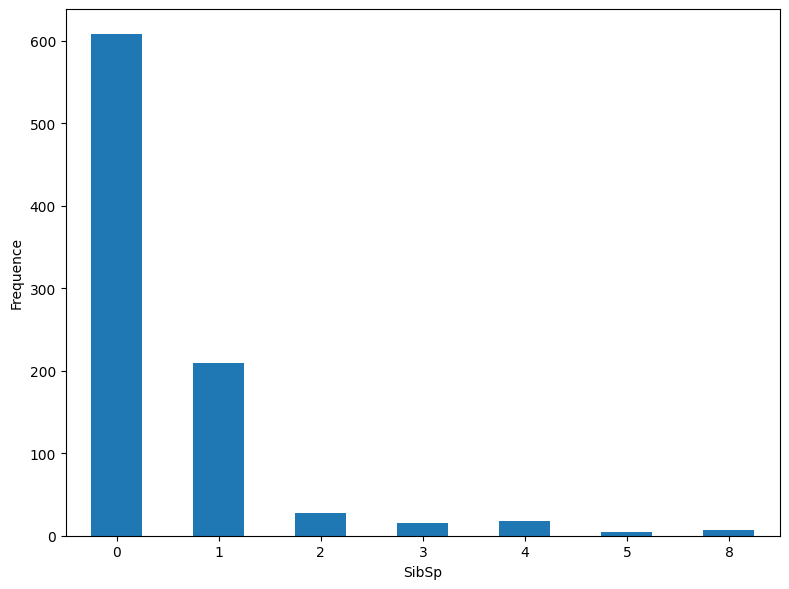

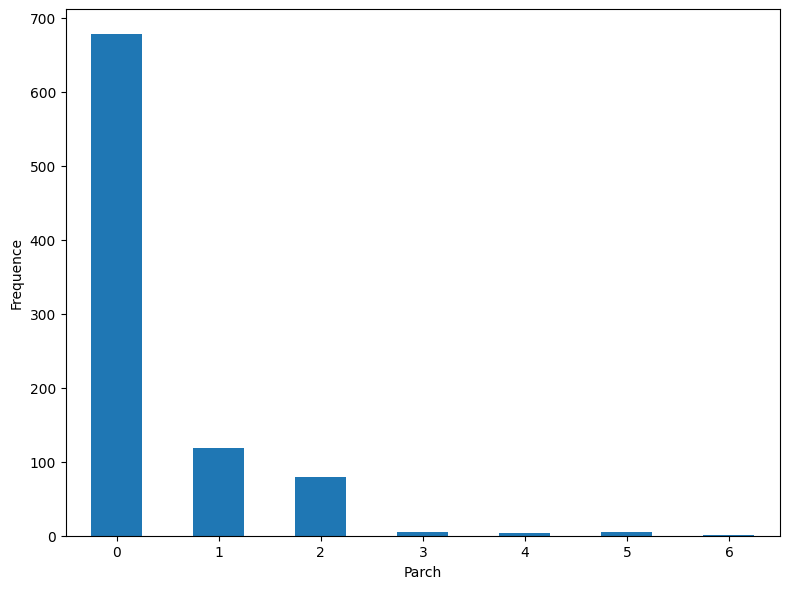

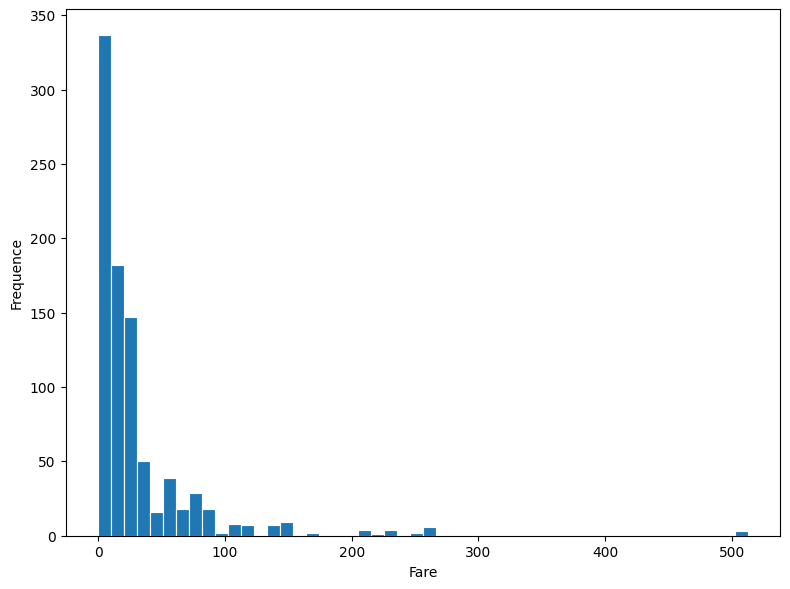

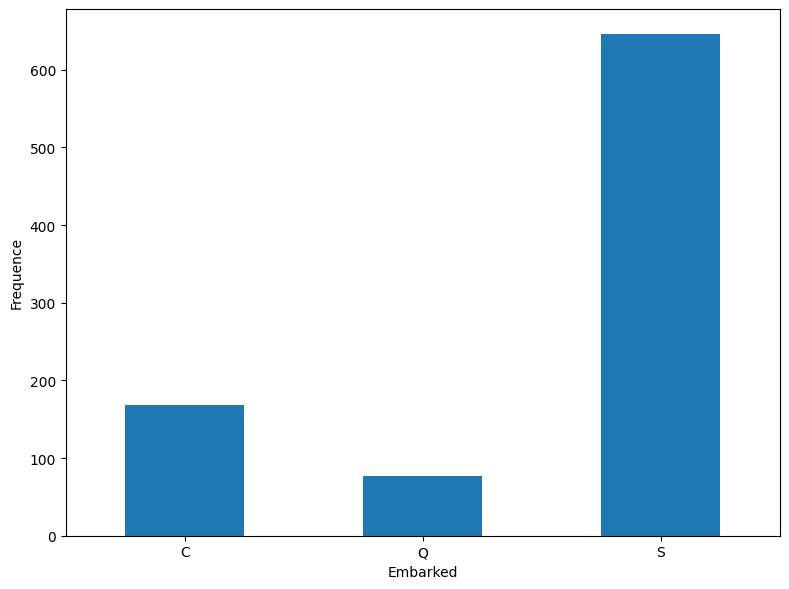

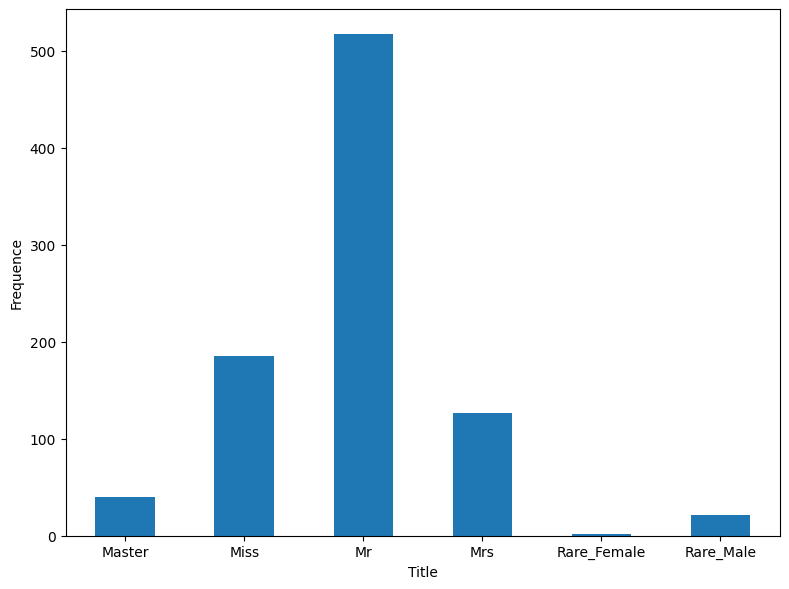

In [ ]:
for i in df.columns:
  plt.figure(figsize=(8,6))
  plt.ylabel("Frequence")
  if i in ["Age","Fare"]:
    sns.histplot(data=df,x=i,bins=50,cbar=True,alpha=1,edgecolor="white")
  else:
    df[i].value_counts().sort_index().plot(kind="bar")
    plt.xlabel(i)
    plt.xticks(rotation=0)
    plt.tight_layout()
  plt.tight_layout()
  plt.show()
  print()

In [ ]:
df["Embarked"]=df["Embarked"].astype("category").cat.codes
df["Sex"]=df["Sex"].astype("category").cat.codes
df["Title"]=df["Title"].astype("category").cat.codes

In [ ]:
data=df.iloc[:,1:]
surv=df.iloc[:,0]

In [ ]:
scaler=RobustScaler()
data=scaler.fit_transform(data)

In [ ]:
scores=[]
for i in range(100):
  scores.append(mutual_info_classif(data,surv))
avg_score=pd.Series(np.mean(scores,axis=0),index=df.iloc[:,1:].columns)
print(avg_score)
data=df[avg_score[avg_score>0.03].index]

Pclass      0.055352
Sex         0.151752
Age         0.040057
SibSp       0.022714
Parch       0.014331
Fare        0.133386
Embarked    0.015053
Title       0.168021
dtype: float64


In [ ]:
#train_data,val_data,train_surv,val_surv=train_test_split(data,surv,test_size=0.2)

# 10-Folds Cross Validation & Model Building

In [ ]:
param_grid_1={"n_estimators":[100,125,150,175,200,225,250,275,300,325]}
param_grid_2={"max_iter":[100,125,150,175,200,225,250,275,300,325]}

rf_start=time.time()
grid_search=GridSearchCV(estimator=RandomForestClassifier(),param_grid=param_grid_1,cv=10,scoring="accuracy",n_jobs=-1,verbose=1)
grid_search.fit(data,surv)
rf_end=time.time()

gbm_start=time.time()
grid_search=GridSearchCV(estimator=HistGradientBoostingClassifier(),param_grid=param_grid_2,cv=10,scoring="accuracy",n_jobs=-1,verbose=1)
grid_search.fit(data,surv)
gbm_end=time.time()

xgb_start=time.time()
grid_search=GridSearchCV(estimator=XGBClassifier(),param_grid=param_grid_1,cv=10,scoring="accuracy",n_jobs=-1,verbose=1)
grid_search.fit(data,surv)
xgb_end=time.time()

RotF_start=time.time()
grid_search=GridSearchCV(estimator=XGBClassifier(),param_grid=param_grid_1,cv=10,scoring="accuracy",n_jobs=-1,verbose=1)
grid_search.fit(data,surv)
RotF_end=time.time()

print()
print("Spend Time of Random Forest:",str(rf_end-rf_start))
print("Spend Time of Gradient Boosting Machine:",str(gbm_end-gbm_start))
print("Spend Time of XGBoost:",str(xgb_end-xgb_start))
print("Spend Time of Rotation Forest:",str(RotF_end-RotF_start))

Fitting 10 folds for each of 10 candidates, totalling 100 fits
Fitting 10 folds for each of 10 candidates, totalling 100 fits
Fitting 10 folds for each of 10 candidates, totalling 100 fits
Fitting 10 folds for each of 10 candidates, totalling 100 fits

Spend Time of Random Forest: 43.18440794944763
Spend Time of Gradient Boosting Machine: 33.69408082962036
Spend Time of XGBoost: 8.545464038848877
Spend Time of Rotation Forest: 6.5099852085113525


In [ ]:
param_grid_rf={"n_estimators":[100,150,200,250,300],"max_depth":[5,10,None],"min_samples_split":[2,5],"min_samples_leaf":[1,2]}
param_grid_gbm={"max_iter":[100,150,200,250,300],"max_depth":[5,10,None],"learning_rate":[0.05,0.1,0.2],"min_samples_leaf":[10,20,30]}
param_grid_xgb={"n_estimators":[225,250,275,300,325,350],"colsample_bytree":[0.8],"max_depth":[5],"reg_alpha":[0.1],"reg_lambda":[1],"learning_rate":[0.05]}
param_grid_RotF={"n_estimators":[100,150,200,250,300],"remove_proportion":[0,0.5,1]}

## Random Forest

In [ ]:
#Waste Area

# model_rf=RandomForestClassifier(n_estimators=250,random_state=100)
# model_rf.fit(train_data,train_surv)
# pred_rf_train=model_rf.predict(train_data)
# pred_rf_val=model_rf.predict(val_data)
# #Confusion Matrix of Random Forest's Train"
# pd.crosstab(train_surv,pred_rf_train,colnames=["predict"],rownames=["actual"])
# #Confusion Matrix of Random Forest's Validation"
# pd.crosstab(val_surv,pred_rf_val,colnames=["predict"],rownames=["actual"])
# accuracy_rf_train=accuracy_score(train_surv,pred_rf_train)
# accuracy_rf_val=accuracy_score(val_surv,pred_rf_val)
# print("Random Forest","\nAccuracy of Train:",accuracy_rf_train,"\nAccuracy of Validation:",accuracy_rf_val)
# f1_score_rf_train=f1_score(train_surv,pred_rf_train)
# f1_score_rf_val=f1_score(val_surv,pred_rf_val)
# print("Random Forest","\nf1-score of Train:",f1_score_rf_train,"\nf1-score of Validation:",f1_score_rf_val)

In [ ]:
grid_search=GridSearchCV(estimator=RandomForestClassifier(),param_grid=param_grid_rf,cv=10,scoring="accuracy",n_jobs=-1,verbose=1)
grid_search.fit(data,surv)
print(grid_search.best_params_)
print(grid_search.best_score_)

Fitting 10 folds for each of 60 candidates, totalling 600 fits
{'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 300}
0.8440574282147315


In [ ]:
model_rf=RandomForestClassifier(**grid_search.best_params_)
model_rf.fit(data,surv)

RandomForestClassifier(max_depth=10, min_samples_leaf=2, min_samples_split=5,
                       n_estimators=300)

In [ ]:
pred_rf_train=model_rf.predict(data)

In [ ]:
pd.crosstab(surv,pred_rf_train,colnames=["predict"],rownames=["actual"])

predict,0,1
actual,,
0,525,24
1,63,279


In [ ]:
accuracy_rf_train=accuracy_score(surv,pred_rf_train)
print("Accuracy of Train:",accuracy_rf_train)

Accuracy of Train: 0.9023569023569024


In [ ]:
precision_rf_train=precision_score(surv,pred_rf_train)
print("Precision of Train:",precision_rf_train)

Precision of Train: 0.9207920792079208


In [ ]:
recall_rf_train=recall_score(surv,pred_rf_train)
print("Recall of Train:",recall_rf_train)

Recall of Train: 0.8157894736842105


In [ ]:
f1_score_rf_train=f1_score(surv,pred_rf_train)
print("f1-score of Train:",f1_score_rf_train)

f1-score of Train: 0.8651162790697674


## Gradient Boosting Machine

In [ ]:
# model_gbm=GradientBoostingClassifier(n_estimators=250,learning_rate=0.05)
# model_gbm.fit(train_data,train_surv)
# pred_gbm_train=model_gbm.predict(train_data)
# pred_gbm_val=model_gbm.predict(val_data)
# #Confusion Matrix of Gradient Boosting Machine's Train"
# pd.crosstab(train_surv,pred_gbm_train,colnames=["predict"],rownames=["actual"])
# #Confusion Matrix of Gradient Boosting Machine's Validation"
# pd.crosstab(val_surv,pred_gbm_val,colnames=["predict"],rownames=["actual"])
# accuracy_gbm_train=accuracy_score(train_surv,pred_gbm_train)
# accuracy_gbm_val=accuracy_score(val_surv,pred_gbm_val)
# print("Gradient Boosting Machine","\nAccuracy of Train:",accuracy_gbm_train,"\nAccuracy of Validation:",accuracy_gbm_val)
# f1_score_gbm_train=f1_score(train_surv,pred_gbm_train)
# f1_score_gbm_val=f1_score(val_surv,pred_gbm_val)
# print("Gradient Boosting Machine","\nf1-score of Train:",f1_score_gbm_train,"\nf1-score of Validation:",f1_score_gbm_val)

In [ ]:
grid_search=GridSearchCV(estimator=HistGradientBoostingClassifier(),param_grid=param_grid_gbm,cv=10,scoring="accuracy",n_jobs=-1,verbose=1)
grid_search.fit(data,surv)
print(grid_search.best_params_)
print(grid_search.best_score_)

Fitting 10 folds for each of 135 candidates, totalling 1350 fits
{'learning_rate': 0.05, 'max_depth': 10, 'max_iter': 100, 'min_samples_leaf': 10}
0.8496379525593006


In [ ]:
model_gbm=HistGradientBoostingClassifier(**grid_search.best_params_)
model_gbm.fit(data,surv)

HistGradientBoostingClassifier(learning_rate=0.05, max_depth=10,
                               min_samples_leaf=10)

In [ ]:
pred_gbm_train=model_gbm.predict(data)

In [ ]:
pd.crosstab(surv,pred_gbm_train,colnames=["predict"],rownames=["actual"])

predict,0,1
actual,,
0,524,25
1,55,287


In [ ]:
accuracy_gbm_train=accuracy_score(surv,pred_gbm_train)
print("Accuracy of Train:",accuracy_gbm_train)

Accuracy of Train: 0.9102132435465768


In [ ]:
precision_gbm_train=precision_score(surv,pred_gbm_train)
print("Precision of Train:",precision_gbm_train)

Precision of Train: 0.9198717948717948


In [ ]:
recall_gbm_train=recall_score(surv,pred_gbm_train)
print("Recall of Train:",recall_gbm_train)

Recall of Train: 0.8391812865497076


In [ ]:
f1_score_gbm_train=f1_score(surv,pred_gbm_train)
print("f1-score of Train:",f1_score_gbm_train)

f1-score of Train: 0.8776758409785933


## XGBoost

In [ ]:
# model_xgb=XGBClassifier(n_estimators=250,learning_rate=0.05)
# model_xgb.fit(train_data,train_surv)
# pred_xgb_train=model_xgb.predict(train_data)
# pred_xgb_val=model_xgb.predict(val_data)
# #Confusion XGBoost's Train"
# pd.crosstab(train_surv,pred_xgb_train,colnames=["predict"],rownames=["actual"])
# #Confusion XGBoost's Validation"
# pd.crosstab(val_surv,pred_xgb_val,colnames=["predict"],rownames=["actual"])
# accuracy_xgb_train=accuracy_score(train_surv,pred_xgb_train)
# accuracy_xgb_val=accuracy_score(val_surv,pred_xgb_val)
# print("XGBoost","\nAccuracy of Train:",accuracy_xgb_train,"\nAccuracy of Validation:",accuracy_xgb_val)
# f1_score_xgb_train=f1_score(train_surv,pred_xgb_train)
# f1_score_xgb_val=f1_score(val_surv,pred_xgb_val)
# print("XGBoost","\nf1-score of Train:",f1_score_xgb_train,"\nf1-score of Validation:",f1_score_xgb_val)

In [ ]:
grid_search=GridSearchCV(estimator=XGBClassifier(),param_grid=param_grid_xgb,cv=10,scoring="roc_auc",n_jobs=-1,verbose=1)
grid_search.fit(data,surv)
print(grid_search.best_params_)
print(grid_search.best_score_)

Fitting 10 folds for each of 6 candidates, totalling 60 fits
{'colsample_bytree': 0.8, 'learning_rate': 0.05, 'max_depth': 5, 'n_estimators': 225, 'reg_alpha': 0.1, 'reg_lambda': 1}
0.8688036952154599


In [ ]:
model_xgb=XGBClassifier(**grid_search.best_params_)
# model_xgb=XGBClassifier(colsample_bytree=0.8,learning_rate=0.05,max_depth=5,n_estimators=250,reg_alpha=0.1,reg_lambda=1)
model_xgb.fit(data,surv)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.05, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=5,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=225,
              n_jobs=None, num_parallel_tree=None, ...)

In [ ]:
pred_xgb_train=model_xgb.predict(data)

In [ ]:
pd.crosstab(surv,pred_xgb_train,colnames=["predict"],rownames=["actual"])

predict,0,1
actual,,
0,521,28
1,59,283


In [ ]:
accuracy_xgb_train=accuracy_score(surv,pred_xgb_train)
print("Accuracy of Train:",accuracy_xgb_train)

Accuracy of Train: 0.9023569023569024


In [ ]:
precision_xgb_train=precision_score(surv,pred_xgb_train)
print("Precision of Train:",precision_xgb_train)

Precision of Train: 0.909967845659164


In [ ]:
recall_xgb_train=recall_score(surv,pred_xgb_train)
print("Recall of Train:",recall_xgb_train)

Recall of Train: 0.827485380116959


In [ ]:
f1_score_xgb_train=f1_score(surv,pred_xgb_train)
print("f1-score of Train:",f1_score_xgb_train)

f1-score of Train: 0.8667687595712098


## Rotation Forest

In [ ]:
# model_RotF=RotationForest(n_estimators=250)
# model_RotF.fit(train_data,train_surv)
# pred_RotF_train=model_RotF.predict(train_data)
# pred_RotF_val=model_RotF.predict(val_data)
# #Confusion Matrix of Rotaion Forest's Train"
# pd.crosstab(train_surv,pred_RotF_train,colnames=["predict"],rownames=["actual"])
# #Confusion Matrix of Rotaion Forest's Validation"
# pd.crosstab(val_surv,pred_RotF_val,colnames=["predict"],rownames=["actual"])
# accuracy_RotF_train=accuracy_score(train_surv,pred_RotF_train)
# accuracy_RotF_val=accuracy_score(val_surv,pred_RotF_val)
# print("Rotaion Forest","\nAccuracy of Train:",accuracy_RotF_train,"\nAccuracy of Validation:",accuracy_RotF_val)
# f1_score_RotF_train=f1_score(train_surv,pred_RotF_train)
# f1_score_RotF_val=f1_score(val_surv,pred_RotF_val)
# print("Rotaion Forest","\nf1-score of Train:",f1_score_RotF_train,"\nf1-score of Validation:",f1_score_rf_val)

In [ ]:
grid_search=GridSearchCV(estimator=RotationForest(),param_grid=param_grid_RotF,cv=10,scoring="accuracy",n_jobs=-1,verbose=1)
grid_search.fit(data,surv)
print(grid_search.best_params_)
print(grid_search.best_score_)

Fitting 10 folds for each of 15 candidates, totalling 150 fits


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


{'n_estimators': 300, 'remove_proportion': 0.5}
0.8137578027465668


In [ ]:
model_RotF=RotationForest(**grid_search.best_params_)
model_RotF.fit(data,surv)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


RotationForest(n_estimators=300)

In [ ]:
pred_RotF_train=model_RotF.predict(data)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


In [ ]:
pd.crosstab(surv,pred_RotF_train,colnames=["predict"],rownames=["actual"])

predict,0,1
actual,,
0,540,9
1,11,331


In [ ]:
accuracy_RotF_train=accuracy_score(surv,pred_RotF_train)
print("Accuracy of Train:",accuracy_RotF_train)

Accuracy of Train: 0.9775533108866442


In [ ]:
precision_RotF_train=precision_score(surv,pred_RotF_train)
print("Precision of Train:",precision_RotF_train)

Precision of Train: 0.9735294117647059


In [ ]:
recall_RotF_train=recall_score(surv,pred_RotF_train)
print("Recall of Train:",recall_RotF_train)

Recall of Train: 0.9678362573099415


In [ ]:
f1_score_RotF_train=f1_score(surv,pred_RotF_train)
print("f1-score of Train:",f1_score_RotF_train)

f1-score of Train: 0.9706744868035191


# Predict Test Data

In [ ]:
path="/content/drive/MyDrive/Titanic/test.csv"
df_test_data=pd.read_csv(path)

In [ ]:
df_test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB


In [ ]:
df_test_data["Title"]=df_test_data["Name"].str.extract(r",\s*([^\.]+)\.",expand=False)
print(df_test_data["Title"].unique())
df["Title"]=df["Title"].replace(["Ms"],"Miss")
df["Title"]=df["Title"].replace(["Rev","Dr","Col"],"Rare_Male")
df["Title"]=df["Title"].replace(["Dona"],"Rare_Female")

['Mr' 'Mrs' 'Miss' 'Master' 'Ms' 'Col' 'Rev' 'Dr' 'Dona']


In [ ]:
df_test_data.drop(["PassengerId","Name","Ticket","Cabin"],axis=1,inplace=True)

In [ ]:
df_test_data["Age"]=df_test_data["Age"].fillna(df.groupby("Title")["Age"].transform("median"))
df_test_data["Fare"]=df_test_data["Fare"].fillna(df["Fare"].mode()[0])

In [ ]:
df_test_data["Embarked"]=df_test_data["Embarked"].astype("category").cat.codes
df_test_data["Sex"]=df_test_data["Sex"].astype("category").cat.codes
df_test_data["Title"]=df_test_data["Title"].astype("category").cat.codes

In [ ]:
scaler=RobustScaler()
test_data=scaler.fit_transform(df_test_data)

In [ ]:
test_data=df_test_data[avg_score[avg_score>0.03].index]

In [ ]:
path="/content/drive/MyDrive/Titanic/gender_submission.csv"
test_surv=pd.read_csv(path).iloc[:,1]

## Random Forest

In [ ]:
pred_rf_test=model_rf.predict(test_data)
pd.crosstab(test_surv,pred_rf_test,colnames=["predict"],rownames=["actual"])

predict,0,1
actual,,
0,260,6
1,18,134


In [ ]:
accuracy_rf_test=accuracy_score(test_surv,pred_rf_test)
print("Accuracy of Train:",accuracy_rf_train)
print("Accuracy of Test:",accuracy_rf_test)
precision_rf_test=precision_score(test_surv,pred_rf_test)
print("\nPrecision of Train:",precision_rf_train)
print("Precision of Test:",precision_rf_test)
recall_rf_test=recall_score(test_surv,pred_rf_test)
print("\nRecall of Train:",recall_rf_train)
print("Recall of Test:",recall_rf_test)
f1_score_rf_test=f1_score(test_surv,pred_rf_test)
print("\nf1-score of Train:",f1_score_rf_train)
print("f1-score of Test:",f1_score_rf_test)

Accuracy of Train: 0.9023569023569024
Accuracy of Test: 0.9425837320574163

Precision of Train: 0.9207920792079208
Precision of Test: 0.9571428571428572

Recall of Train: 0.8157894736842105
Recall of Test: 0.881578947368421

f1-score of Train: 0.8651162790697674
f1-score of Test: 0.9178082191780822


## Gradient Boosting Machine

In [ ]:
pred_gbm_test=model_gbm.predict(test_data)
pd.crosstab(test_surv,pred_gbm_test,colnames=["predict"],rownames=["actual"])

predict,0,1
actual,,
0,260,6
1,27,125


In [ ]:
accuracy_gbm_test=accuracy_score(test_surv,pred_gbm_test)
print("Accuracy of Train:",accuracy_gbm_train)
print("Accuracy of Test:",accuracy_gbm_test)
precision_gbm_test=precision_score(test_surv,pred_gbm_test)
print("\nPrecision of Train:",precision_gbm_train)
print("Precision of Test:",precision_gbm_test)
recall_gbm_test=recall_score(test_surv,pred_gbm_test)
print("\nRecall of Train:",recall_gbm_train)
print("Recall of Test:",recall_gbm_test)
f1_score_gbm_test=f1_score(test_surv,pred_gbm_test)
print("\nf1-score of Train:",f1_score_gbm_train)
print("f1-score of Test:",f1_score_gbm_test)

Accuracy of Train: 0.9102132435465768
Accuracy of Test: 0.9210526315789473

Precision of Train: 0.9198717948717948
Precision of Test: 0.9541984732824428

Recall of Train: 0.8391812865497076
Recall of Test: 0.8223684210526315

f1-score of Train: 0.8776758409785933
f1-score of Test: 0.8833922261484098


## XGBoost

In [ ]:
pred_xgb_test=model_xgb.predict(test_data)
pd.crosstab(test_surv,pred_xgb_test,colnames=["predict"],rownames=["actual"])

predict,0,1
actual,,
0,255,11
1,33,119


In [ ]:
accuracy_xgb_test=accuracy_score(test_surv,pred_xgb_test)
print("Accuracy of Train:",accuracy_xgb_train)
print("Accuracy of Test:",accuracy_xgb_test)
precision_xgb_test=precision_score(test_surv,pred_xgb_test)
print("\nPrecision of Train:",precision_xgb_train)
print("Precision of Test:",precision_xgb_test)
recall_xgb_test=recall_score(test_surv,pred_xgb_test)
print("\nRecall of Train:",recall_xgb_train)
print("Recall of Test:",recall_xgb_test)
f1_score_xgb_test=f1_score(test_surv,pred_xgb_test)
print("\nf1-score of Train:",f1_score_xgb_train)
print("f1-score of Test:",f1_score_xgb_test)

Accuracy of Train: 0.9023569023569024
Accuracy of Test: 0.8947368421052632

Precision of Train: 0.909967845659164
Precision of Test: 0.9153846153846154

Recall of Train: 0.827485380116959
Recall of Test: 0.7828947368421053

f1-score of Train: 0.8667687595712098
f1-score of Test: 0.8439716312056738


## Rotaion Forest

In [ ]:
pred_RotF_test=model_RotF.predict(test_data)
pd.crosstab(test_surv,pred_RotF_test,colnames=["predict"],rownames=["actual"])

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


predict,0,1
actual,,
0,248,18
1,30,122


In [ ]:
accuracy_RotF_test=accuracy_score(test_surv,pred_RotF_test)
print("Accuracy of Train:",accuracy_RotF_train)
print("Accuracy of Test:",accuracy_RotF_test)
precision_RotF_test=precision_score(test_surv,pred_RotF_test)
print("\nPrecision of Train:",precision_RotF_train)
print("Precision of Test:",precision_RotF_test)
recall_RotF_test=recall_score(test_surv,pred_RotF_test)
print("\nRecall of Train:",recall_RotF_train)
print("Recall of Test:",recall_RotF_test)
f1_score_RotF_test=f1_score(test_surv,pred_RotF_test)
print("\nf1-score of Train:",f1_score_RotF_train)
print("f1-score of Test:",f1_score_RotF_test)

Accuracy of Train: 0.9775533108866442
Accuracy of Test: 0.8851674641148325

Precision of Train: 0.9735294117647059
Precision of Test: 0.8714285714285714

Recall of Train: 0.9678362573099415
Recall of Test: 0.8026315789473685

f1-score of Train: 0.9706744868035191
f1-score of Test: 0.8356164383561644


In [ ]:
results={"accuracy":{"random forest":{"train":accuracy_rf_train,"test":accuracy_rf_test},
          "gradient boosting machine":{"train":accuracy_gbm_train,"test":accuracy_gbm_test},
          "xgboost":{"train":accuracy_xgb_train,"test":accuracy_xgb_test},
          "rotation_forest":{"train":accuracy_RotF_train,"test":accuracy_RotF_test}},
    "precision":{"random forest":{"train":precision_rf_train,"test":precision_rf_test},
          "gradient boosting machine":{"train":precision_gbm_train,"test":precision_gbm_test},
          "xgboost":{"train":precision_xgb_train,"test":precision_xgb_test},
          "rotation_forest":{"train":precision_RotF_train,"test":precision_RotF_test}},
    "recall":{"random forest":{"train":recall_rf_train,"test":recall_rf_test},
        "gradient boosting machine":{"train":recall_gbm_train,"test":recall_gbm_test},
        "xgboost":{"train":recall_xgb_train,"test":recall_xgb_test},
        "rotation_forest":{"train":recall_RotF_train,"test":recall_RotF_test}},
    "f1 score":{"random forest":{"train":f1_score_rf_train,"test":f1_score_rf_test},
          "gradient boosting machine":{"train":f1_score_gbm_train,"test":f1_score_gbm_test},
          "xgboost":{"train":f1_score_xgb_train,"test":f1_score_xgb_test},
          "rotation_forest":{"train":f1_score_RotF_train,"test":f1_score_RotF_test}},
    }


        index                      model dataset     score
0    accuracy              Random Forest   Train  0.902357
1    accuracy              Random Forest    Test  0.942584
2    accuracy  Gradient Boosting Machine   Train  0.910213
3    accuracy  Gradient Boosting Machine    Test  0.921053
4    accuracy                    Xgboost   Train  0.902357
5    accuracy                    Xgboost    Test  0.894737
6    accuracy            Rotation_Forest   Train  0.977553
7    accuracy            Rotation_Forest    Test  0.885167
8   precision              Random Forest   Train  0.920792
9   precision              Random Forest    Test  0.957143
10  precision  Gradient Boosting Machine   Train  0.919872
11  precision  Gradient Boosting Machine    Test  0.954198
12  precision                    Xgboost   Train  0.909968
13  precision                    Xgboost    Test  0.915385
14  precision            Rotation_Forest   Train  0.973529
15  precision            Rotation_Forest    Test  0.8714

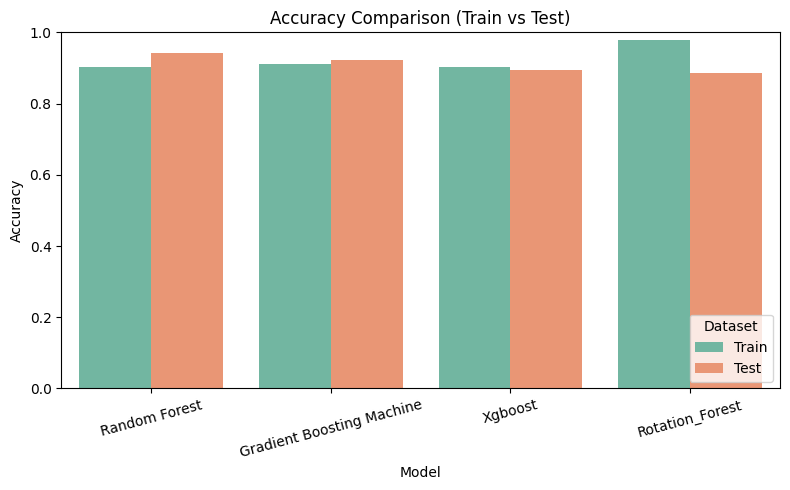


        index                      model dataset     score
8   precision              Random Forest   Train  0.920792
9   precision              Random Forest    Test  0.957143
10  precision  Gradient Boosting Machine   Train  0.919872
11  precision  Gradient Boosting Machine    Test  0.954198
12  precision                    Xgboost   Train  0.909968
13  precision                    Xgboost    Test  0.915385
14  precision            Rotation_Forest   Train  0.973529
15  precision            Rotation_Forest    Test  0.871429


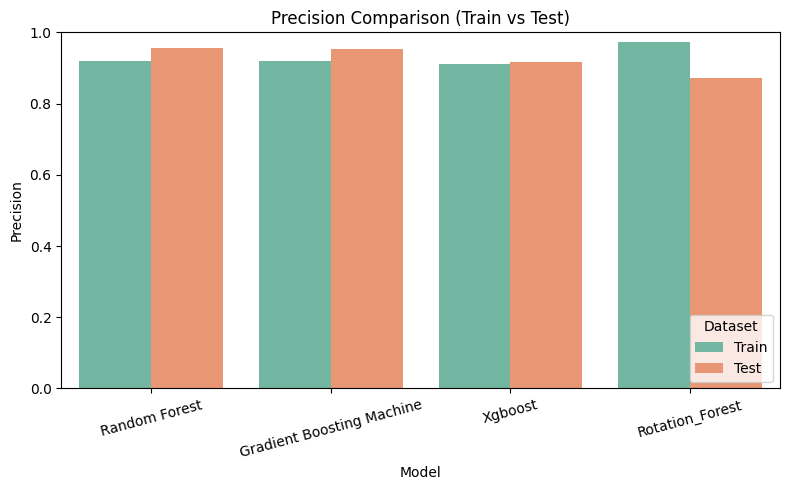


     index                      model dataset     score
16  recall              Random Forest   Train  0.815789
17  recall              Random Forest    Test  0.881579
18  recall  Gradient Boosting Machine   Train  0.839181
19  recall  Gradient Boosting Machine    Test  0.822368
20  recall                    Xgboost   Train  0.827485
21  recall                    Xgboost    Test  0.782895
22  recall            Rotation_Forest   Train  0.967836
23  recall            Rotation_Forest    Test  0.802632


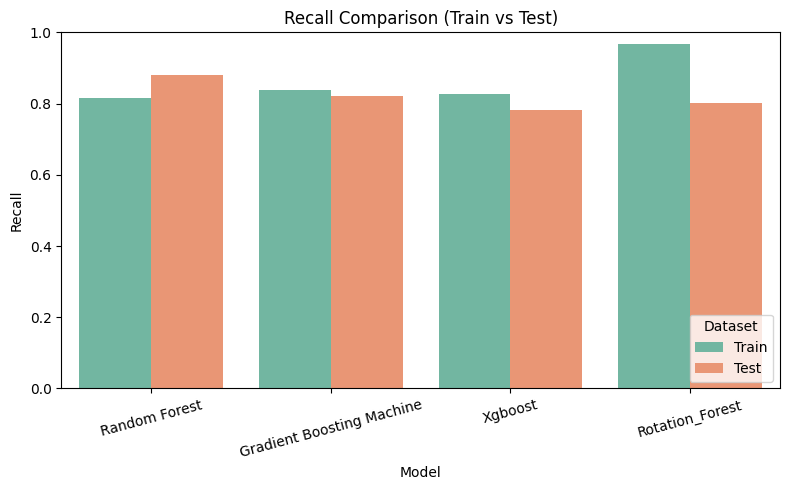


       index                      model dataset     score
24  f1 score              Random Forest   Train  0.865116
25  f1 score              Random Forest    Test  0.917808
26  f1 score  Gradient Boosting Machine   Train  0.877676
27  f1 score  Gradient Boosting Machine    Test  0.883392
28  f1 score                    Xgboost   Train  0.866769
29  f1 score                    Xgboost    Test  0.843972
30  f1 score            Rotation_Forest   Train  0.970674
31  f1 score            Rotation_Forest    Test  0.835616


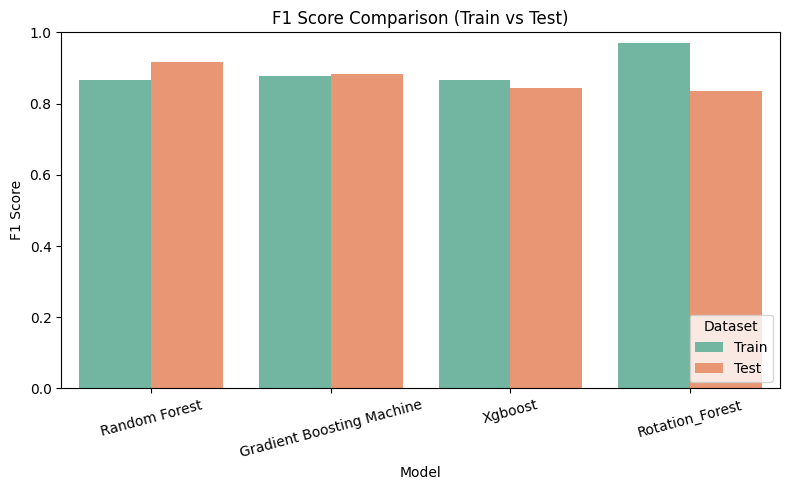

In [ ]:
plt_data=[]
for index,model_dict in results.items():
    for model,scores_dict in model_dict.items():
        for dataset,score in scores_dict.items():
          plt_data.append({"index":index,"model":model.title(),"dataset":dataset.title(),"score":score})
plt_data=pd.DataFrame(plt_data)
print(plt_data)

for i in ["accuracy","precision","recall","f1 score"]:
  plt.figure(figsize=(8,5))
  a=plt_data[plt_data["index"]==i]
  sns.barplot(data=a,x="model",y="score",hue="dataset",palette="Set2")
  print(plt_data[plt_data["index"]==i])
  plt.title(i.title()+" Comparison (Train vs Test)")
  plt.ylim(0,1)
  plt.ylabel(i.title())
  plt.xlabel("Model")
  plt.xticks(rotation=15)
  plt.legend(title="Dataset",loc="lower right")
  plt.tight_layout()
  plt.show()
  print()